In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import(
    load_boston,
    make_regression
)

In [2]:
import pandas as pd

In [48]:
import time

In [5]:
X,y = make_regression(n_samples=10000, n_features=20,n_informative=20,noise=10,random_state=1)

u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

print(X.shape)

(10000, 20)


In [6]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [55]:
def hypothesis(X,theta):
    return np.dot(X,theta)


def gradient(X,y,theta):
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_ - y))
    return grad/m


def get_error(X,y,theta):
    y_ = hypothesis(X,theta)
    return np.sum((y_ - y)**2)/X.shape[0]


def gradient_descent(X,y,learning_rate=0.01,max_epochs=300):
    theta = np.zeros(X.shape[1])
    error_list = []

    for i in range(max_epochs):
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad
        
        error = get_error(X,y,theta)
        error_list.append(error)
    
    return theta,error_list


def min_batch_gradient_descent(X,y,batch_size=200,learning_rate=0.01,max_epochs=5):

    m,n = X.shape
    
    theta = np.zeros((n,))
    error_list = []
    
    data = np.hstack((X,y.reshape(-1,1)))
    
    for i in range(max_epochs):
        total_batches = m//batch_size
        np.random.shuffle(data)
        
        for j in range(total_batches):
            batch_data = data[j*batch_size:(j+1)*batch_size,:]
            
            x_batch = batch_data[:,:-1]
            y_batch = batch_data[:,-1]
            
            grad = gradient(x_batch,y_batch,theta)
            theta = theta - learning_rate*grad

            e = get_error(x_batch,y_batch,theta)
            error_list.append(e)
            
    return theta,error_list

In [56]:
start = time.time()
theta,error_list = gradient_descent(X,y)
end = time.time()
print(end-start)

0.14162111282348633


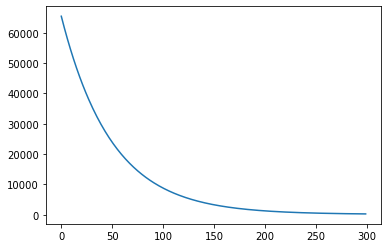

In [57]:
plt.plot(error_list)

In [58]:
start = time.time()
theta,error_list = min_batch_gradient_descent(X,y)
end = time.time()
print(end-start)

0.1069188117980957


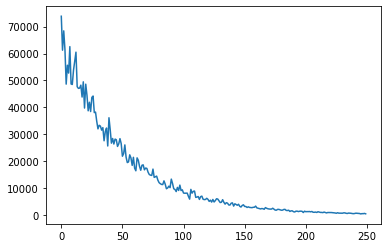

In [59]:
plt.plot(error_list)

## As we can see that convergence rate is fast compared to Batch Gradient Descent but the losses are noisy
- For SGD we can use batch_size = 1 in the mini_batch code only